# Random Data Simulation and Fitting Isotopomer Distribution Using Neural Network

Addtion of neural network to fit isotopomer distribution. We will complete this with the following workflow: 
- Create simple nn to take the place of the basic fit within the isotopomer class.
- Expand this to handle multiple samples, adding functions to generate distributions and sim data for different samples.
- Train and tune the network and add overfitting prevention measures.
- Generalise the network to handle different metabolites.
- Use our networks to fit to real HSQC and GCMS data

Import necessary packages:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

Create an isotopomerAnalysis object:

In [ ]:
ia = isotopomerAnalysis.IsotopomerAnalysis()

Define metabolite parameters:

In [ ]:
# Ensure isotopomers is correctly initialized
isotopomers = [
    [0, 0, 0],  # Unlabelled
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

num_samples = 1000
hsqc = [0, 1, 1]
metabolite = 'L-LacticAcid'


In [ ]:
ia.init_metabolite_multiple_samples(metabolite, hsqc, num_samples=num_samples)

Initialising and set isoptomer, HSQC and gcms data for multiple samples:

In [ ]:
generated_percentages = []
for exp_index in range(num_samples):
    random_percentages = ia.generate_isotopomer_percentages()  # Generate new random percentages for each sample
    generated_percentages.append(random_percentages)  # Store generated percentages for comparison
    
    ia.set_fit_isotopomers_simple(metabolite=metabolite, isotopomers=isotopomers, percentages=random_percentages, exp_index=exp_index)
    ia.sim_hsqc_data(metabolite=metabolite, exp_index=exp_index, isotopomers=isotopomers, percentages=random_percentages)
    ia.sim_gcms_data(metabolite, exp_index)

Add noise to HSQC and GC-MS data:

In [ ]:
ia.add_noise_to_hsqc_gcms(metabolite, num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)

Modify object states for the data:

In [ ]:
ia.use_hsqc_multiplet_data = True
ia.use_gcms_data = True
ia.use_nmr1d_data = False

Fitting the neural network:

In [ ]:
ia.fit_data_nn(metabolite=metabolite, fit_isotopomers=isotopomers, percentages=generated_percentages, num_samples=num_samples)

## Addressing Overfitting: 

To prevent overfitting in my neural network model for predicting isotopomer distributions, several strategies have been implemented:

- First, use of a validation set to monitor the model's performance during training, ensuring it maintains its ability to generalize to unseen data has been used. This involves splitting the data into training and validation sets and using early stopping to halt training when the validation loss stops improving, which helps avoid overfitting by preventing the model from learning noise in the training data. 
 
- Additionally, dropout layers have been employed within the neural network architecture. Dropout randomly deactivates a fraction of neurons during each training step, which forces the network to learn more robust features and reduces reliance on any specific neurons. 

- Regularization techniques, such as L2 regularization, have been used to penalize large weights, discouraging the model from becoming too complex. 

- Finally, the model has been trained with an adequate amount of data (1000 samples), enhancing the model's ability to generalize.

## Generalising for other metabolites:

In [2]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_three_carbon = [
    [0, 0, 0],  # Unlabelled
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

isotopomers_aspartate = [
    [0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 1],
    [1, 1, 1, 1]
]

num_samples = 1000
hsqc_three_carbon = [[1, 1, 1], [0, 1, 1]]
hsqc_aspartate = [
    [0, 1, 1, 0], 
    [1, 1, 1, 0], 
    [0, 1, 1, 1], 
    [1, 1, 1, 1]
]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['three-carbon', 'aspartate'], hsqc=hsqc_three_carbon, num_samples=num_samples)

# Generate and set isotopomers for three-carbon metabolite
for hsqc in hsqc_three_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('three-carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='three-carbon', isotopomers=isotopomers_three_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='three-carbon', exp_index=exp_index, isotopomers=isotopomers_three_carbon, percentages=random_percentages)
        ia.sim_gcms_data('three-carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('three-carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='three-carbon', fit_isotopomers=isotopomers_three_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'three_carbon_{hsqc}')

# Generate and set isotopomers for aspartate
for hsqc in hsqc_aspartate:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('aspartate')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='aspartate', isotopomers=isotopomers_aspartate, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='aspartate', exp_index=exp_index, isotopomers=isotopomers_aspartate, percentages=random_percentages)
        ia.sim_gcms_data('aspartate', exp_index)

    ia.add_noise_to_hsqc_gcms('aspartate', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='aspartate', fit_isotopomers=isotopomers_aspartate, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'aspartate_{hsqc}')

# Save results to an Excel file
ia.save_results('results.xlsx')


Trial 200 Complete [00h 01m 47s]
val_loss: 20.53839683532715

Best val_loss So Far: 17.318084716796875
Total elapsed time: 02h 34m 27s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - loss: 276.7698 - val_loss: 270.1278
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 259.3806 - val_loss: 261.0565
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 249.4652 - val_loss: 249.9429
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241.4877 - val_loss: 245.6904
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 238.3989 - val_loss: 243.3895
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 236.5983 - val_loss: 241.0748
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.3429 - val_loss: 239.4780
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 234.2017 - val_loss: 238.5572
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 242.2497 - val_loss: 237.9764
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 232

So let's generalize using hsqc vector length and adding 5 and 6 carbon:

In [2]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_three_carbon = [
    [0, 0, 0],  # Unlabelled
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1]
]

isotopomers_four_carbon = [
    [0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [1, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 0, 1],
    [0, 0, 1, 1],
    [1, 1, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 1, 1, 1],

    [1, 1, 1, 1]
]

isotopomers_five_carbon = [
    [0, 0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0],
    [1, 1, 0, 1, 0],

    [1, 1, 0, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1],
    [1, 1, 1, 1, 0],
    [1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]

isotopomers_six_carbon = [
    [0, 0, 0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0, 0, 0],

    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0],
    [1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 0],
    [1, 1, 0, 0, 1, 0],
    [1, 1, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 0],
    [1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 0, 1, 1, 0],

    [1, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 1, 1, 0, 0, 1],
    [0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 1],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 1, 1, 0, 1],
    [0, 0, 1, 0, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [1, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 1, 0],
    [1, 1, 1, 0, 0, 1],
    [1, 1, 0, 1, 1, 0],
    [1, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 0],
    [1, 0, 1, 1, 0, 1],
    [1, 0, 1, 0, 1, 1],
    [1, 0, 0, 1, 1, 1],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 0, 1],
    [0, 1, 1, 0, 1, 1],
    [0, 1, 0, 1, 1, 1],

    [0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0],
    [1, 1, 1, 1, 0, 1],
    [1, 1, 1, 0, 1, 1],
    [1, 1, 0, 1, 1, 1],
    [1, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1]
]


num_samples = 1000
hsqc_three_carbon = [[1, 1, 1], [0, 1, 1]]
hsqc_four_carbon = [
    [0, 1, 1, 0], 
    [1, 1, 1, 0], 
    [0, 1, 1, 1], 

    [1, 1, 1, 1]
]
hsqc_five_carbon = [
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]
hsqc_six_carbon = [
    [1, 1, 1, 1, 1, 1]
]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['three-carbon', 'four_carbon', 'five_carbon', 'six_carbon'], hsqc=hsqc_three_carbon, num_samples=num_samples)


In [3]:
# Generate and set isotopomers for three-carbon metabolite
for hsqc in hsqc_three_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('three-carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='three-carbon', isotopomers=isotopomers_three_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='three-carbon', exp_index=exp_index, isotopomers=isotopomers_three_carbon, percentages=random_percentages)
        ia.sim_gcms_data('three-carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('three-carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='three-carbon', fit_isotopomers=isotopomers_three_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'three_carbon_{hsqc}')



Trial 1 Complete [00h 00m 09s]
val_loss: 70.60567474365234

Best val_loss So Far: 70.60567474365234
Total elapsed time: 00h 00m 09s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 397.7047 - val_loss: 307.9269
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280.4815 - val_loss: 236.6448
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 221.8270 - val_loss: 200.8009
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 186.3108 - val_loss: 169.7246
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 159.5713 - val_loss: 148.6936
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 148.1974 - val_loss: 140.0850
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 132.0251 - val_loss: 126.4655
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.9102 - val_loss: 117.0106
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.4400 - val_loss: 120.7401
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 109.602

In [3]:
# Generate and set isotopomers four carbon
for hsqc in hsqc_four_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('four_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='four_carbon', isotopomers=isotopomers_four_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='four_carbon', exp_index=exp_index, isotopomers=isotopomers_four_carbon, percentages=random_percentages)
        ia.sim_gcms_data('four_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('four_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='four_carbon', fit_isotopomers=isotopomers_four_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'four_carbon_{hsqc}')


Trial 200 Complete [00h 00m 14s]
val_loss: 21.142719268798828

Best val_loss So Far: 19.92566680908203
Total elapsed time: 00h 54m 42s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 235.0499 - val_loss: 56.4922
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 50.6008 - val_loss: 28.8825
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 34.1898 - val_loss: 27.7236
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.3778 - val_loss: 26.2921
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.1500 - val_loss: 26.3845
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.9964 - val_loss: 26.6004
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3622 - val_loss: 25.4714
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.8132 - val_loss: 25.2192
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.4315 - val_loss: 24.8441
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.3446 - val_loss: 2

OSError: [WinError 145] The directory is not empty: 'my_dir/four_carbon_[1, 1, 1, 0]'

In [ ]:
for hsqc in hsqc_five_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('five_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='five_carbon', isotopomers=isotopomers_five_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='five_carbon', exp_index=exp_index, isotopomers=isotopomers_five_carbon, percentages=random_percentages)
        ia.sim_gcms_data('five_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('five_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='five_carbon', fit_isotopomers=isotopomers_five_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'five_carbon_{hsqc}')



In [ ]:
for hsqc in hsqc_six_carbon:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('six_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='six_carbon', isotopomers=isotopomers_six_carbon, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data(metabolite='six_carbon', exp_index=exp_index, isotopomers=isotopomers_six_carbon, percentages=random_percentages)
        ia.sim_gcms_data('six_carbon', exp_index)

    ia.add_noise_to_hsqc_gcms('six_carbon', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='six_carbon', fit_isotopomers=isotopomers_six_carbon, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'six_carbon_{hsqc}')

# Save results to an Excel file
ia.save_results('results.xlsx')

## Glutamate and Glutamine, Special case:

In [1]:
import numpy as np
import pandas as pd
from metabolabpytools import isotopomerAnalysis

ia = isotopomerAnalysis.IsotopomerAnalysis()

# Define isotopomers for different metabolites
isotopomers_five_carbon_special = [
    [0, 0, 0, 0, 0],  # Unlabelled
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0],
    [1, 0, 0, 1, 0],
    [1, 0, 0, 0, 1],
    [0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1],
    [0, 0, 1, 1, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 0, 1, 1],
    [1, 1, 1, 0, 0],
    [1, 1, 0, 1, 0],
    [1, 1, 0, 0, 1],
    [1, 0, 1, 1, 0],
    [1, 0, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 0, 1],
    [0, 1, 0, 1, 1],
    [0, 0, 1, 1, 1],
    [1, 1, 1, 1, 0],
    [1, 1, 1, 0, 1],
    [1, 1, 0, 1, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
]

num_samples = 1000
hsqc_five_carbon_special = [[0, 1, 1, 1, 0]]

# Initialize the metabolites with multiple samples
ia.init_metabolite_multiple_samples(metabolites=['five-carbon-special'], hsqc=hsqc_five_carbon_special, num_samples=num_samples)

# Generate and set isotopomers for five-carbon special case
for hsqc in hsqc_five_carbon_special:
    generated_percentages = []
    for exp_index in range(num_samples):
        random_percentages = ia.generate_isotopomer_percentages('five_carbon')
        generated_percentages.append(random_percentages)
        
        ia.set_fit_isotopomers_simple(metabolite='five-carbon-special', isotopomers=isotopomers_five_carbon_special, percentages=random_percentages, exp_index=exp_index)
        ia.sim_hsqc_data_special_case(metabolite='five-carbon-special', exp_index=exp_index, isotopomers=isotopomers_five_carbon_special, percentages=random_percentages)
        ia.sim_gcms_data('five-carbon-special', exp_index)

    ia.add_noise_to_hsqc_gcms('five-carbon-special', num_samples, hsqc_noise_level=0.03, gcms_noise_level=0.075)
    ia.fit_data_nn(metabolite='five-carbon-special', fit_isotopomers=isotopomers_five_carbon_special, percentages=generated_percentages, num_samples=num_samples, hsqc=hsqc, tuner_project_name=f'five_carbon_special_{hsqc}')

# Save results to an Excel file
ia.save_results('results_special_case.xlsx')


Trial 10 Complete [00h 00m 09s]
val_loss: 7.999727725982666

Best val_loss So Far: 5.2565813064575195
Total elapsed time: 00h 01m 26s
Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 104.9087 - val_loss: 87.9540
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.3810 - val_loss: 57.0953
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.5917 - val_loss: 43.3569
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.2269 - val_loss: 35.8995
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.0436 - val_loss: 30.0872
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.3697 - val_loss: 35.2768
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29.6483 - val_loss: 22.1540
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.0083 - val_loss: 17.9851
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.6433 - val_loss: 22.0756
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6275 - val_loss: 11

## Plotting figure:

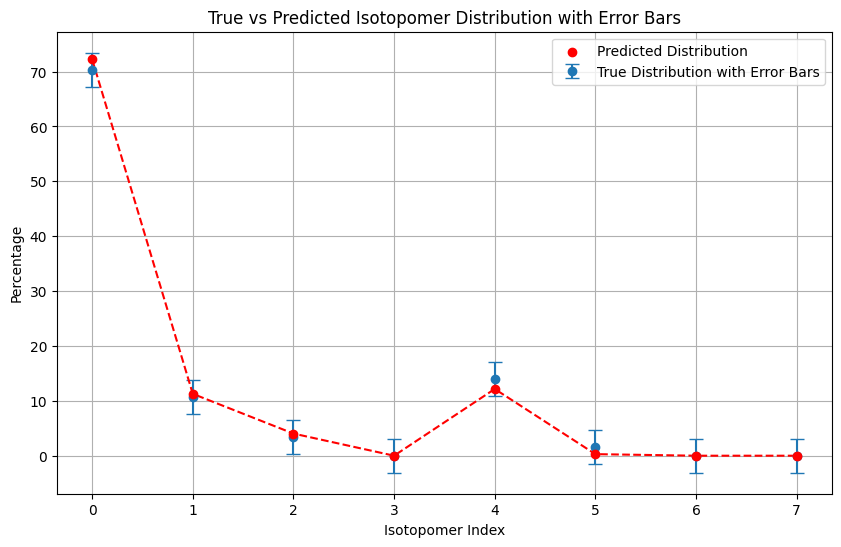

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
true_distribution = np.array([70.33597867, 10.6144484, 3.47637436, 0.0, 13.96382585, 1.60937272, 0.0, 0.0])
predicted_distribution = np.array([72.24472, 11.2743104, 4.034303, 0.0, 12.1608775, 0.2857926, 0.0, 0.0])
error_percentage = 3.1  # 3.1%

# Error bars
errors = error_percentage

# Plot
x = np.arange(len(true_distribution))

plt.figure(figsize=(10, 6))
plt.errorbar(x, true_distribution, yerr=errors, fmt='o', label='True Distribution with Error Bars', capsize=5)
plt.scatter(x, predicted_distribution, color='red', label='Predicted Distribution', zorder=5)
plt.plot(x, predicted_distribution, color='red', linestyle='dashed')

plt.xlabel('Isotopomer Index')
plt.ylabel('Percentage')
plt.title('True vs Predicted Isotopomer Distribution with Error Bars')
plt.legend()
plt.grid(True)
plt.xticks(x)
plt.show()


'pip' is not recognized as an internal or external command,
operable program or batch file.
